# Imputaion

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../data/titanic_train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df['Age'].isna().sum()

177

In [4]:
df.shape

(891, 12)

In [5]:
new_df = df.dropna()
new_df.shape

(183, 12)

In [6]:
df['Age'].mean()

29.69911764705882

In [7]:
df['Age'].fillna(df['Age'].mean()).isna().sum()

0

In [8]:
df['Age'].isna().sum()

177

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [10]:
df['Age'].isna().sum()

0

In [11]:
cat_columns = df.dtypes[df.dtypes == 'object'].index

pd.DataFrame(
    [(df[col].notna().sum(), df[col].unique().size, df[col].mode()[0]) for col in cat_columns], 
    index=cat_columns, 
    columns=['Available', 'Unique', 'Mode']
)

,Available,Unique,Mode
Name,891,891,"Abbing, Mr. Anthony"
Sex,891,2,male
Ticket,891,681,1601
Cabin,204,148,B96 B98
Embarked,889,4,S


In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

## Imputation using sklearn

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, MissingIndicator

In [14]:
si = SimpleImputer(strategy='mean')

In [15]:
si.fit(df['Age'].values.reshape(-1, 1))

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [16]:
si.statistics_

array([29.69911765])

In [17]:
si.transform(df['Age'].values.reshape(-1, 1))[:10, :]

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ]])

In [18]:
si2 = SimpleImputer(strategy='most_frequent')
si2.fit(df['Embarked'].values.reshape(-1, 1))
si2.statistics_

array(['S'], dtype=object)

In [19]:
mi = MissingIndicator(sparse=False)

In [20]:
result = mi.fit_transform(df[['Sex', 'Cabin', 'Embarked']])
pd.concat([df, pd.DataFrame(result)], axis=1).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,True
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,True


# Transformation

Так как алгоритмы машинного обучения, в большинстве своем, работают только с числами, необходимо определить преобразования над столбцами. Варианты:
- Применение функции
- Дать лейбл
- Задать порядок
- Бинаризировать
- One Hot Encoding

Параметры преобразований определяются на обучающей выборке и используются для преобразования как обучающей, так и тестовой выборки без изменений. Данные преобразования также являются частью алгоритма машинного обучения

Кроме того, для некоторых алгоритмов важно распределение данных и их "размер" относительно друг друга. Тут применяются такие методы как:
- Стандартизация
- Нормализация

In [21]:
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [22]:
n = 50

sample_data = {
    'bin': np.random.random(n),
    'sex': np.random.choice(['M', 'F'], n),
    'city': np.random.choice(['Moscow', 'SPB', 'Krasnodar'], n),
    'edu': np.random.choice(['School', 'Bachelor', 'Specialist', 'Master', 'PhD'], n, p=[0.2, 0.3, 0.3, 0.15, 0.05]),
    'income': np.random.lognormal(9, 1, size=n) + 15000
}

df = pd.DataFrame(sample_data)

In [23]:
df.head()

,bin,sex,city,edu,income
0,0.214462,F,SPB,Specialist,18100.419119
1,0.978125,M,Moscow,Bachelor,19425.711609
2,0.039398,M,SPB,School,33479.206635
3,0.749893,M,SPB,Specialist,16863.479546
4,0.916085,F,Moscow,Bachelor,21555.191489


In [24]:
t = Binarizer(threshold=0.5)
t.fit(df.bin.values.reshape(-1, 1))
t.transform(df.bin.values.reshape(-1, 1))[:5]

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [25]:
t = LabelEncoder()
t.fit_transform(df.sex)[:5]

array([0, 1, 1, 1, 0])

In [26]:
t.classes_

array(['F', 'M'], dtype=object)

In [27]:
t.inverse_transform([1, 1, 0, 0])

array(['M', 'M', 'F', 'F'], dtype=object)

In [28]:
t = OrdinalEncoder(categories=[['School', 'Bachelor', 'Specialist', 'Master', 'PhD']])
t.fit_transform(df.edu.values.reshape(-1, 1))[:10]

array([[2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.]])

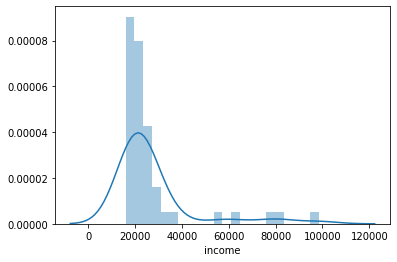

In [29]:
%matplotlib inline
import seaborn as sns

sns.distplot(df.income)

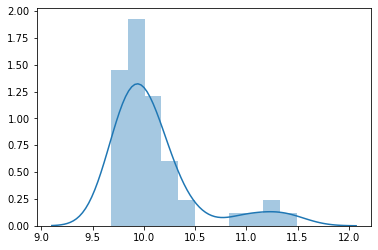

In [30]:
t = FunctionTransformer(np.log, np.exp, validate=False)
sns.distplot(t.fit_transform(df.income.values.reshape(-1, 1)))

In [31]:
t.inverse_transform(12)

162754.79141900392

In [32]:
t = OneHotEncoder(sparse=False)
t.fit_transform(df.city.values.reshape(-1, 1))[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [33]:
pd.concat(
    [
        df.city, 
        pd.DataFrame(
            t.transform(df.city.values.reshape(-1, 1)), 
            columns=[f'OHE_{c}' for c in t.categories_[0]]
        )
    ], 
    axis=1
).head(10)

,city,OHE_Krasnodar,OHE_Moscow,OHE_SPB
0,SPB,0.0,0.0,1.0
1,Moscow,0.0,1.0,0.0
2,SPB,0.0,0.0,1.0
3,SPB,0.0,0.0,1.0
4,Moscow,0.0,1.0,0.0
5,Moscow,0.0,1.0,0.0
6,Moscow,0.0,1.0,0.0
7,Moscow,0.0,1.0,0.0
8,Krasnodar,1.0,0.0,0.0
9,SPB,0.0,0.0,1.0


In [34]:
t.categories_

[array(['Krasnodar', 'Moscow', 'SPB'], dtype=object)]

In [35]:
df.columns

Index(['bin', 'sex', 'city', 'edu', 'income'], dtype='object')

In [36]:
transformations = {
    'bin': Binarizer(threshold=0.5),
    'sex': LabelEncoder(),
    'city': OneHotEncoder(sparse=False),
    'edu': OrdinalEncoder(categories=[['School', 'Bachelor', 'Specialist', 'Master', 'PhD']]),
    'income': FunctionTransformer(np.log, np.exp, validate=False),
}

In [37]:
res = transformations['sex'].fit_transform(df['sex'].values.reshape(-1, 1)).reshape(-1, 1)
for col, t in transformations.items():
    if col != 'sex':
        res = np.hstack([res, t.fit_transform(df[col].values.reshape(-1, 1))])

df_transformed = pd.DataFrame(res)

C:\Program_Files_Special\Python373\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
df[:5]

,bin,sex,city,edu,income
0,0.214462,F,SPB,Specialist,18100.419119
1,0.978125,M,Moscow,Bachelor,19425.711609
2,0.039398,M,SPB,School,33479.206635
3,0.749893,M,SPB,Specialist,16863.479546
4,0.916085,F,Moscow,Bachelor,21555.191489


In [39]:
df_transformed[:5]

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,1.0,2.0,9.803690
1,1.0,1.0,0.0,1.0,0.0,1.0,9.874353
2,1.0,0.0,0.0,0.0,1.0,0.0,10.418680
3,1.0,1.0,0.0,0.0,1.0,2.0,9.732906
4,0.0,1.0,0.0,1.0,0.0,1.0,9.978372


In [40]:
stds = StandardScaler()

stds.fit(df_transformed[6].values.reshape(-1, 1))

print(stds.mean_)
print(stds.var_)

stds.transform(df_transformed[6].values.reshape(-1, 1))[:5]

[10.0952987]
[0.17468232]


array([[-0.6977108 ],
       [-0.52864174],
       [ 0.77373137],
       [-0.86707259],
       [-0.27976238]])

In [41]:
mms = MinMaxScaler((-1, 1))

mms.fit(df_transformed[6].values.reshape(-1, 1))

print(mms.data_min_)
print(mms.data_max_)
print(mms.data_range_)
print(mms.scale_)

mms.transform(df_transformed[6].values.reshape(-1, 1))[:5]

[9.67398979]
[11.49910717]
[1.82511738]
[1.09581993]


array([[-0.85787152],
       [-0.78043821],
       [-0.18395382],
       [-0.9354389 ],
       [-0.66645194]])